# Model Development

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('automobileEDA.csv')

In [3]:
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


---
## 1. Simple Linear Regression and Multiple Linear Regression


<h3>Simple Linear Regression</h3>
It is a model that helps us to understand the linear relation ship between two variables

1. The predictor variable (X)\\
2. The response or dependent variable that we want to predict (Y)

The result of Linear Regression is a **Linear Function** that predicts the response(dependent) variable as a function of the predictor(independent) variable

$$
Y: Response \ Variable\\
X: Predictor \ Variable\\
$$

The equation is given by:
$$
Y hat = a + bX
$$

here, 
- a is the intercept of the regression line0, the value of Y when X is 0
- b refers to the slope of the regression line, the value with which Y changes when X is increased by 1 unit

In [4]:
#importing libraries for regression
from sklearn.linear_model import LinearRegression

Creating a Simple Linear Regression model for **highway-mpg** and **price** and fitting it for the variables

In [5]:
#creating a linear regression object
lm = LinearRegression()

#displaying the parameters for the linear regression object
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
#creating X and Y variables for linear regression function
X = df[['highway-mpg']]
Y = df['price']

In [7]:
#fitting the linear model using the X and Y variables
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
#calculating and printing the prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

**What is the value of intercept(a)**

In [9]:
#printing the value of intercept(a)
lm.intercept_

38423.3058581574

**What is the value of slope(b)**

In [10]:
#printing the value of slope(b)
lm.coef_

array([-821.73337832])

**Our final estimated linear model is**

**price** = 38423.3058581574 - 821.73337832 x **highway-mpg**

---

Creating a Simple Linear Regression model for **engine-size** and **price** and fitting it for the variables

In [11]:
#creating a linear regression object
lm1 = LinearRegression()

#displaying the paramenters for the linear regression object
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#fitting the linear regression model for X and Y variables
lm1.fit(df[['engine-size']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

***What is the value of intercept(a)***

In [13]:
lm1.intercept_

-7963.338906281024

***What is the value of slope(b)***

In [14]:
lm1.coef_

array([166.86001569])

**Our final estimated linear model is**

**price** = -7963.338906281024 + 166.86001569 x **engine-size**

---

<h3>Multiple Linear Regression</h3>
We will now use Multiple Regression Model to predict the car price based on more than one variable

$$
Y  : Response \ Variable\\
X1 : Predictor \ Variable 1\\
X2 : Predictor \ Variable 2\\
X3 : Predictor \ Variable 3\\
X4 : Predictor \ Variable 4\\
$$
$$
a  : Intercept\\
b1 : Coefficients \ of \ Variable 1\\
b2 : Coefficients \ of \ Variable 2\\
b3 : Coefficients \ of \ Variable 3\\
b4 : Coefficients \ of \ Variable 4\\ 
$$
The equation is given by:
$$
Y hat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

We will use these variables for predicting prices

- horsepower
- curb-weight
- engine-size
- highway-mpg

Creating a Multiple Regression model for **horsepower**, **curb-weight**, **engine-size**, **highway-mpg** and fitting it for the variables

In [15]:
#developing a linear model using these variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [16]:
#fitting the linear model 
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

***What is the value of intercept(a)***

In [17]:
lm.intercept_

-15806.62462632923

***What is the value of coefficients (b1, b2, b3, b4)***

In [18]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

**Our final estimated model is**

**price** = -15806.62462632923 + 
             53.49574423 x **horsepower** + 
             4.70770099 x **curb-weight** + 
             81.53026382 x **engine-size** +
             36.05748882 x **highway-mpg**
             

---

Creating a Multiple Regression Model for **normalized-losses**, **highway-mpg** and fitting it for the variables

In [19]:
#creating a multiple regression model
lm2 = LinearRegression()

#fitting the multiple regression model for X and Y variables
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

***What is the value for intercept(a)***

In [20]:
lm2.intercept_

38201.31327245727

***What is the value for coeffieients (b1 and b2)***

In [21]:
lm2.coef_

array([   1.49789586, -820.45434016])

**Our final estimated model is**

**price** = 38201.31327245727 + 1.49789586 x **normalized-losses** - 820.45434016 x **highway-mpg**

---
## 2. Model Evaluation using Visualization

In [22]:
#importing the visualization package seaborn
import seaborn as sns
%matplotlib inline

### 1. Simple Liner Regression Plot

This plot will show a combination of scattered data points (a **scatter plot**), as well as fitted **linear regression** line through the data.

This will give us an estimate of

- relationship between two variable
- stringth of correlation
- direction (positive or negative) of correlation

(0, 48292.59713012479)

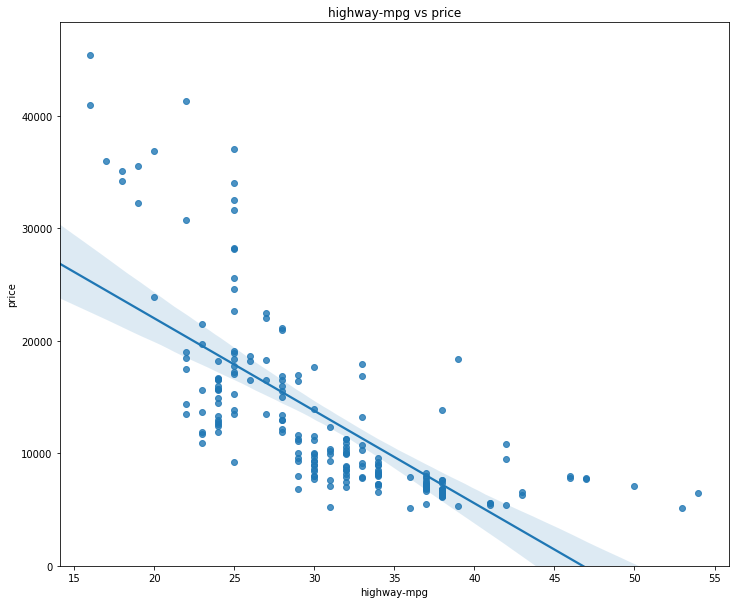

In [23]:
#ploting a regression plot between highway-mpg and price
plt.figure(figsize = (12, 10))
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.title('highway-mpg vs price')
plt.ylim(0,)

The above plot shows a negative relation between highway-mpg and price

(0, 47422.919330307624)

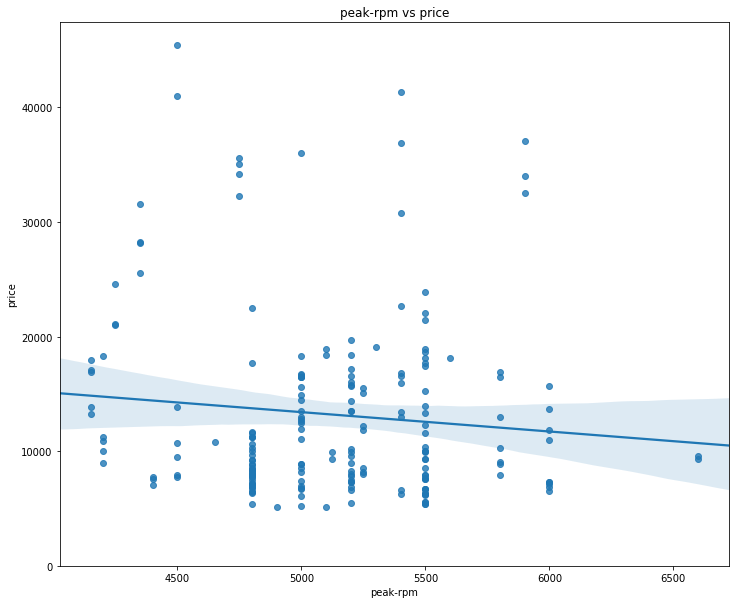

In [24]:
#ploting a regression plot between peak-rpm and price
plt.figure(figsize = (12, 10))
sns.regplot(x = 'peak-rpm', y = 'price', data = df)
plt.title('peak-rpm vs price')
plt.ylim(0,)

The above regression plot is almost flat that's why is is hard to figure out whether highway-mpg affects the price of a vehicle

Let us verify our regression plots with a correlation table between variables **peak-rpm**, **highway-mpg**, **price**

In [25]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### 2. Residual Plots

Let us plot a residual plot for **highway-mpg** and **price** to study the residual on the verticle y-axis and independent variable an the horizontal x-axis

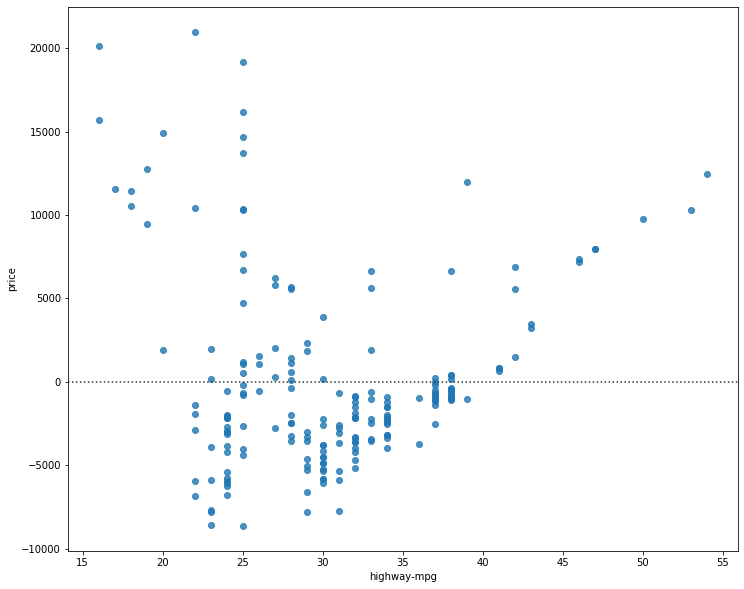

In [26]:
plt.figure(figsize = (12, 10))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

The above residual plot tells us that the variables are not randomly spread out on the horizontal x-axis, which means that the Linear Regression Model might not be a suitable fit for our data

### Multiple Linear Regression Plot

We can look at the fit of the Multiple Regression Model by looking at the **distribution plot**. We can compare the distribution of the fitted values from the model and plot them against the actual values from the dataframe

In [27]:
#making a prediction
Y_hat = lm.predict(Z)

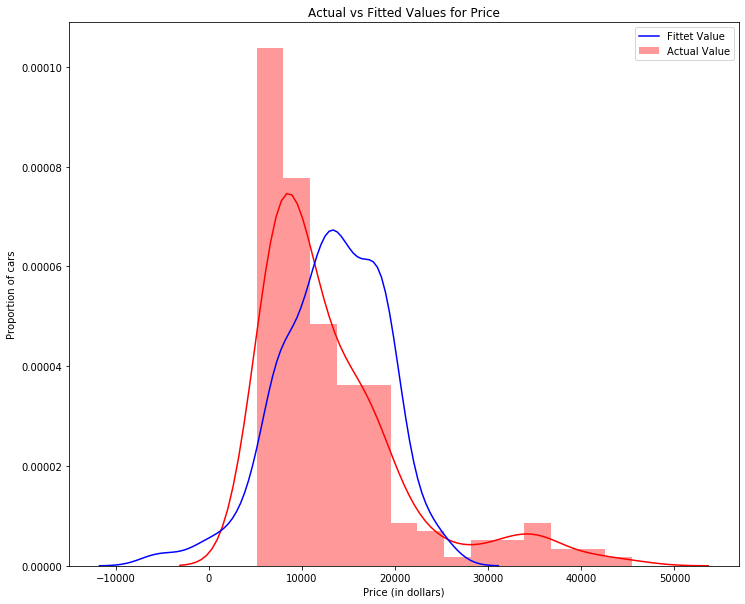

In [28]:
#p
plt.figure(figsize = (12, 10))
ax1 = sns.distplot(df['price'], hist = 'False', color = 'r', label = 'Actual Value')
sns.distplot(Yhat, hist = False, color = 'b', label = 'Fittet Value', ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of cars')

plt.show()
plt.close()